In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
conn = pymysql.connect(
    host="127.0.0.1", 
    user="root",
    password = "SecretCoder@123", 
    database = "studentperformanceDB" 
)

RuntimeError: 'cryptography' package is required for sha256_password or caching_sha2_password auth methods

In [ ]:
df=pd.read_sql("SELECT * FROM studentsperformance;",conn)
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_14284\1043362886.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql("SELECT * FROM studentsperformance;",conn)


In [ ]:
# 1. Average score by gender
gender_avg = df.groupby("gender")[["math score","reading score","writing score"]].mean()
print("\n Average score by gender: \n",gender_avg)



 Average score by gender: 
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [ ]:
#2. Average scores by prental education
parent_avg = df.groupby("parental level of education")[["math score","reading score","writing score"]].mean()
print("\n Average score by parental education: \n",parent_avg)




 Average score by parental education: 
                              math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


In [ ]:
#3. Effect of test preparation
prep_avg = df.groupby("test preparation course")[["math score","reading score","writing score"]].mean()
print("\n Effect of Test preparation: \n ",prep_avg)


 Effect of Test preparation: 
                           math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


In [ ]:
# 4. Student scoring above average in all subjects
avg_math =df["math score"].mean()
avg_reading =df["reading score"].mean()
avg_writing =df["writing score"].mean()

above_avg = df[(df["math score"] > avg_math)  & (df["reading score"] > avg_reading) & (df["writing score"] > avg_writing)]
print('\n Student scoring above average in all subjects: \n' , above_avg)




 Student scoring above average in all subjects: 
      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
..      ...            ...                         ...           ...   
989  female        group D                some college  free/reduced   
990    male        group E                 high school  free/reduced   
995  female        group E             master's degree      standard   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0           

In [ ]:
sns.set(style="whitegrid")

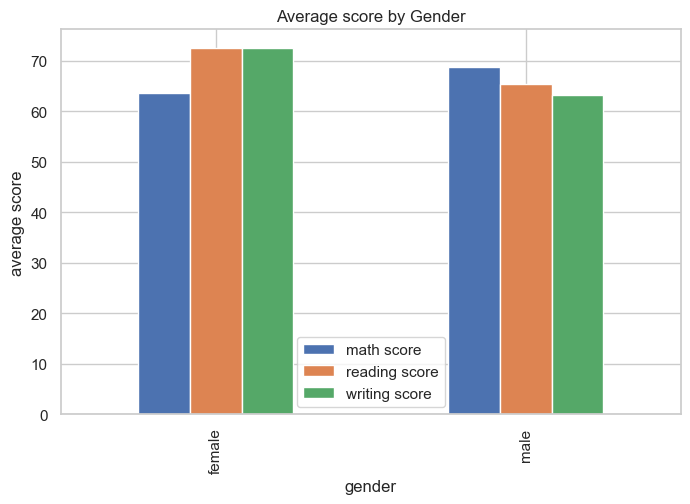

In [ ]:
#1.gender-wise average scores
gender_avg.plot(kind="bar",
figsize=(8,5))
plt.title("Average score by Gender")
plt.ylabel("average score")
plt.show()


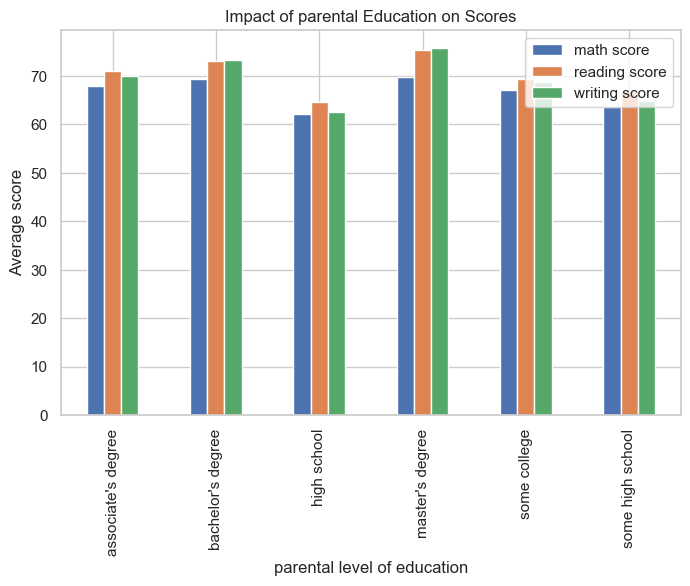

In [ ]:
#2.parental education impact
parent_avg.plot(kind="bar",
figsize=(8,5))
plt.title("Impact of parental Education on Scores")
plt.ylabel("Average score")
plt.show()




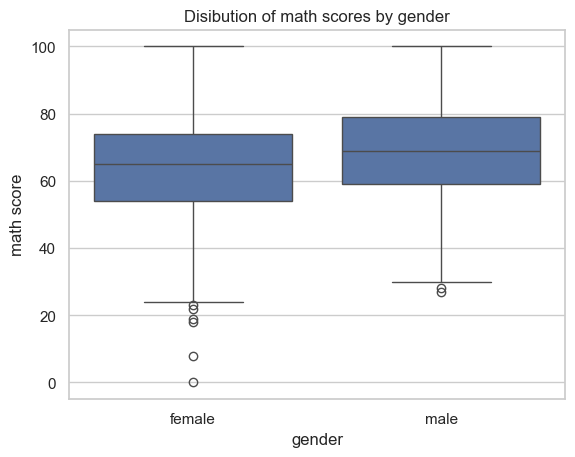

In [ ]:
#boxplot: disibution of math scores by gender
plt.Figure(figsize=(8,7))
sns.boxplot(x="gender",y="math score",data=df)
plt.title("Disibution of math scores by gender")
plt.show()

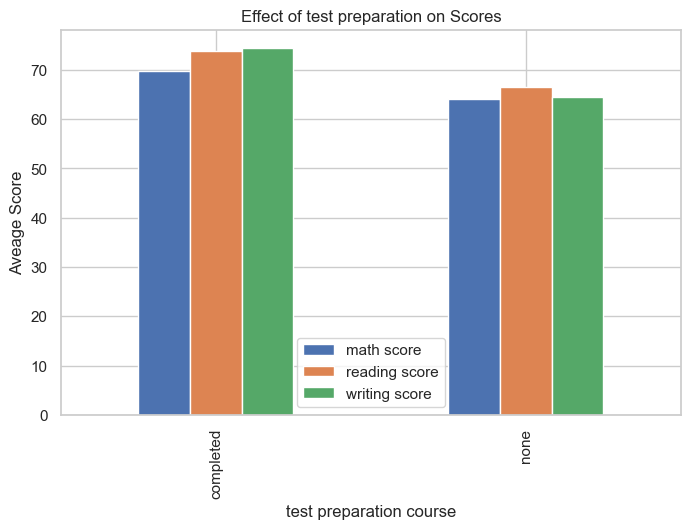

In [ ]:
#4.Effect of Test Preparation of score
prep_avg.plot(kind="bar",figsize=(8,5))
plt.title("Effect of test preparation on Scores")
plt.ylabel("Aveage Score")
plt.show()


In [ ]:
conn.close()
print("\n Analysis Completed Succeesfully!")


 Analysis Completed Succeesfully!
